In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep = ',')

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [147]:
#getting idea of the range of monthly income.
attritionAndIncome = data[['Attrition', 'MonthlyIncome']].sort_values(by=['MonthlyIncome'])

In [148]:
attritionAndIncome

,Attrition,MonthlyIncome
513,Yes,1009
727,No,1051
764,No,1052
1338,Yes,1081
1365,Yes,1091
...,...,...
568,Yes,19859
165,No,19926
851,No,19943
746,No,19973


In [149]:
attritionAndIncome['binning'] = pd.cut(attritionAndIncome['MonthlyIncome'], bins=29)

In [150]:
attritionAndIncome

,Attrition,MonthlyIncome,binning
513,Yes,1009,"(990.01, 1663.828]"
727,No,1051,"(990.01, 1663.828]"
764,No,1052,"(990.01, 1663.828]"
1338,Yes,1081,"(990.01, 1663.828]"
1365,Yes,1091,"(990.01, 1663.828]"
...,...,...,...
568,Yes,19859,"(19344.172, 19999.0]"
165,No,19926,"(19344.172, 19999.0]"
851,No,19943,"(19344.172, 19999.0]"
746,No,19973,"(19344.172, 19999.0]"


In [151]:
OnlyYesIncome = attritionAndIncome[attritionAndIncome["Attrition"].str.match('Yes')]
yesIncomeSorted= OnlyYesIncome.groupby(by =['binning']).size().reset_index()
yesIncomeSorted

,binning,0
0,"(990.01, 1663.828]",13
1,"(1663.828, 2318.655]",33
2,"(2318.655, 2973.483]",67
3,"(2973.483, 3628.31]",15
4,"(3628.31, 4283.138]",15
5,"(4283.138, 4937.966]",17
6,"(4937.966, 5592.793]",12
7,"(5592.793, 6247.621]",11
8,"(6247.621, 6902.448]",7
9,"(6902.448, 7557.276]",4


In [152]:
OnlyNoIncome = attritionAndIncome[attritionAndIncome["Attrition"].str.match('No')]
NoIncomeSorted= OnlyNoIncome.groupby(by =['binning']).size().reset_index()
NoIncomeSorted

,binning,0
0,"(990.01, 1663.828]",12
1,"(1663.828, 2318.655]",90
2,"(2318.655, 2973.483]",171
3,"(2973.483, 3628.31]",88
4,"(3628.31, 4283.138]",95
5,"(4283.138, 4937.966]",122
6,"(4937.966, 5592.793]",113
7,"(5592.793, 6247.621]",68
8,"(6247.621, 6902.448]",81
9,"(6902.448, 7557.276]",29


In [173]:
newDataIncome = pd.merge(yesIncomeSorted, NoIncomeSorted, on = 'binning').rename(columns={"0_x": "Yes", "0_y":"No"})
def getRatioYN(row):
    return row['Yes']/ row['No']
newDataIncome['Yes_No_Ratio'] = newDataIncome.apply(getRatioYN, axis =1)

In [174]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
printmd('Lower the yes_no_ratio lower the attrition is. So, employee with very lowest salary has the highest attrition')
newDataIncome.sort_values(by = 'Yes_No_Ratio')


Lower the yes_no_ratio lower the attrition is. So, employee with very lowest salary has the highest attrition

,binning,Yes,No,Yes_No_Ratio
22,"(15415.207, 16070.034]",0,7,0.000000
26,"(18034.517, 18689.345]",0,11,0.000000
25,"(17379.69, 18034.517]",0,16,0.000000
20,"(14105.552, 14760.379]",0,6,0.000000
23,"(16070.034, 16724.862]",0,15,0.000000
24,"(16724.862, 17379.69]",0,23,0.000000
21,"(14760.379, 15415.207]",0,5,0.000000
15,"(10831.414, 11486.241]",1,19,0.052632
16,"(11486.241, 12141.069]",1,15,0.066667
27,"(18689.345, 19344.172]",2,27,0.074074


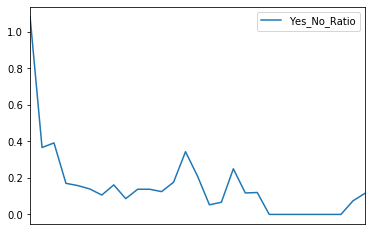

In [176]:
import matplotlib.pyplot as plt
newDataIncome.plot(x = "binning", y = "Yes_No_Ratio")
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.show()

In [9]:
#getting idea of the range of distance.
attritionAndDistance = data[['Attrition', 'DistanceFromHome']].sort_values(by=['DistanceFromHome'])

In [17]:
attritionAndDistance.head()
attritionAndDistance.tail(20)

,Attrition,DistanceFromHome,binning
271,Yes,29,"(27.0, 29.0]"
424,No,29,"(27.0, 29.0]"
204,Yes,29,"(27.0, 29.0]"
1426,No,29,"(27.0, 29.0]"
1109,No,29,"(27.0, 29.0]"
1324,No,29,"(27.0, 29.0]"
61,No,29,"(27.0, 29.0]"
460,No,29,"(27.0, 29.0]"
1073,No,29,"(27.0, 29.0]"
141,No,29,"(27.0, 29.0]"


In [14]:
#getting 14 equal binned size
attritionAndDistance['binning'] = pd.cut(attritionAndDistance['DistanceFromHome'], bins=14)

In [15]:
attritionAndDistance.head()

,Attrition,DistanceFromHome,binning
0,Yes,1,"(0.972, 3.0]"
1121,No,1,"(0.972, 3.0]"
414,Yes,1,"(0.972, 3.0]"
1135,No,1,"(0.972, 3.0]"
400,No,1,"(0.972, 3.0]"


In [19]:
attritionAndDistance[attritionAndDistance["Attrition"] == "Yes"].count()

Attrition           237
DistanceFromHome    237
binning             237
dtype: int64

In [20]:
attritionAndDistance[attritionAndDistance["Attrition"] == "No"].count()

Attrition           1233
DistanceFromHome    1233
binning             1233
dtype: int64

In [93]:
#Now counting the YES attrition for each binned value.
OnlyYes = attritionAndDistance[attritionAndDistance["Attrition"].str.match('Yes')]
yesSorted= OnlyYes.groupby(by =['binning']).size().reset_index()
yesSorted

,binning,0
0,"(0.972, 3.0]",68
1,"(3.0, 5.0]",19
2,"(5.0, 7.0]",18
3,"(7.0, 9.0]",28
4,"(9.0, 11.0]",15
5,"(11.0, 13.0]",12
6,"(13.0, 15.0]",9
7,"(15.0, 17.0]",12
8,"(17.0, 19.0]",7
9,"(19.0, 21.0]",7


In [94]:
OnlyNo = attritionAndDistance[attritionAndDistance["Attrition"].str.match('No')]
noSorted = OnlyNo.groupby(by =['binning']).size().reset_index()
noSorted

,binning,0
0,"(0.972, 3.0]",435
1,"(3.0, 5.0]",110
2,"(5.0, 7.0]",125
3,"(7.0, 9.0]",137
4,"(9.0, 11.0]",100
5,"(11.0, 13.0]",27
6,"(13.0, 15.0]",38
7,"(15.0, 17.0]",40
8,"(17.0, 19.0]",41
9,"(19.0, 21.0]",36


In [95]:
yesSorted['binning']

0     (0.972, 3.0]
1       (3.0, 5.0]
2       (5.0, 7.0]
3       (7.0, 9.0]
4      (9.0, 11.0]
5     (11.0, 13.0]
6     (13.0, 15.0]
7     (15.0, 17.0]
8     (17.0, 19.0]
9     (19.0, 21.0]
10    (21.0, 23.0]
11    (23.0, 25.0]
12    (25.0, 27.0]
13    (27.0, 29.0]
Name: binning, dtype: category
Categories (14, interval[float64]): [(0.972, 3.0] < (3.0, 5.0] < (5.0, 7.0] < (7.0, 9.0] ... (21.0, 23.0] < (23.0, 25.0] < (25.0, 27.0] < (27.0, 29.0]]

In [124]:
newDataDistance = pd.merge(yesSorted, noSorted, on = 'binning').rename(columns={"0_x": "Yes", "0_y":"No"})

In [127]:
def getRatio(row):
    return row['No']/ row['Yes']
newDataDistance['No_Yes_Ratio'] = newDataDistance.apply(getRatio, axis =1)

In [146]:
#This shows higher the ratio, lower the attrition is. We can see the close distance once has the lower attrition 


printmd('This shows higher the ratio, lower the attrition is. We can see the close distance once has the lower attrition. Also, the mean distances has higher attrition')
newDataDistance.sort_values(by = 'No_Yes_Ratio')

This shows higher the ratio, lower the attrition is. We can see the close distance once has the lower attrition. Also, the mean distances has higher attrition

,binning,Yes,No,No_Yes_Ratio
11,"(23.0, 25.0]",18,35,1.944444
5,"(11.0, 13.0]",12,27,2.250000
10,"(21.0, 23.0]",11,35,3.181818
7,"(15.0, 17.0]",12,40,3.333333
6,"(13.0, 15.0]",9,38,4.222222
3,"(7.0, 9.0]",28,137,4.892857
9,"(19.0, 21.0]",7,36,5.142857
12,"(25.0, 27.0]",6,31,5.166667
1,"(3.0, 5.0]",19,110,5.789474
8,"(17.0, 19.0]",7,41,5.857143


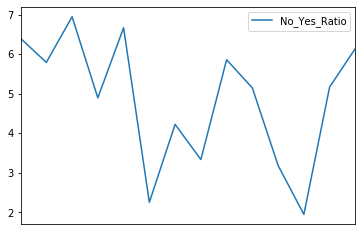

In [177]:
import matplotlib.pyplot as plt
newDataDistance.plot(x = "binning", y = "No_Yes_Ratio")
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.show()